In [2]:
import pandas as pd
df=pd.read_pickle('df_OS2.pkl')
df

scenario  gw  res  esm  tax  ssp  ag  \
0      ssp_ag3_soc3_gwhi_exp_gfdl_NDC_Tax_ffict   3    2    1    1    2   3   
1        ssp_ag3_soc3_gwhi_exp_gfdl_NDC_Tax_uct   3    2    1    2    2   3   
2    ssp_ag3_soc3_gwhi_exp_hadgem_NDC_Tax_ffict   3    2    2    1    2   3   
3      ssp_ag3_soc3_gwhi_exp_hadgem_NDC_Tax_uct   3    2    2    2    2   3   
4      ssp_ag3_soc3_gwhi_exp_ipsl_NDC_Tax_ffict   3    2    3    1    2   3   
..                                          ...  ..  ...  ...  ...  ...  ..   
565    ssp_socio3_ag4_gwmed_rs_gfdl_NDC_Tax_uct   2    1    1    2    1   4   
566  ssp_socio3_ag4_gwmed_rs_hadgem_NDC_Tax_uct   2    1    2    2    1   4   
567    ssp_socio3_ag4_gwmed_rs_ipsl_NDC_Tax_uct   2    1    3    2    1   4   
568   ssp_socio3_ag4_gwmed_rs_miroc_NDC_Tax_uct   2    1    4    2    1   4   
569  ssp_socio3_ag4_gwmed_rs_noresm_NDC_Tax_uct   2    1    5    2    1   4   

     soc  
0      3  
1      3  
2      3  
3      3  
4      3  
..   ...  
565    3  
566    3  
567    3  
568    3  
569    3  

[180 rows x 8 columns]

In [3]:
columns = ['gw', 'res', 'esm', 'tax', 'ssp', 'ag', 'soc']

# Print unique values and their counts for each specified column
for column in columns:
    unique_values = df[column].unique()
    count = len(unique_values)
    print(f"Unique values in '{column}': {unique_values}")


# Print frequency of each unique value for each specified column
for column in columns:
    value_counts = df[column].value_counts()
    print(f"Frequencies in '{column}':\n{value_counts}\n")

Unique values in 'gw': [3 1 2]
Unique values in 'res': [2 1]
Unique values in 'esm': [1 2 3 4 5]
Unique values in 'tax': [1 2]
Unique values in 'ssp': [2 1]
Unique values in 'ag': [3 4]
Unique values in 'soc': [3]
Frequencies in 'gw':
gw
3    60
1    60
2    60
Name: count, dtype: int64

Frequencies in 'res':
res
2    90
1    90
Name: count, dtype: int64

Frequencies in 'esm':
esm
1    36
2    36
3    36
4    36
5    36
Name: count, dtype: int64

Frequencies in 'tax':
tax
1    90
2    90
Name: count, dtype: int64

Frequencies in 'ssp':
ssp
1    120
2     60
Name: count, dtype: int64

Frequencies in 'ag':
ag
3    120
4     60
Name: count, dtype: int64

Frequencies in 'soc':
soc
3    180
Name: count, dtype: int64



In [9]:
import pandas as pd
import os
import shutil

# Load the .pkl file to get scenarios
pkl_data = pd.read_pickle('OS_2_extracted/df_OS2.pkl')
scenarios = pkl_data['scenario'].unique()

# Directory containing your .csv files
source_directory = 'C:/Users/HP/Desktop/OSTI_Application_DD_Water_Basins/7. BOI_OSTI_29_June/0. Results_BOI_ALL_2Dmaps/0. BOI_scenario_counts_csvs'

# Directory where you want to copy the files
target_directory = 'OS_2_BOI_scenarios'
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# List all files in the source directory
files = os.listdir(source_directory)

# Loop through the files and copy matching files
for file in files:
    # Check if the file is a CSV file and the name without extension is in scenarios
    if file.endswith('.csv') and file[:-4] in scenarios:
        source_path = os.path.join(source_directory, file)
        target_path = os.path.join(target_directory, file)
        shutil.copy2(source_path, target_path)
        print(f'Copied {file} to {target_directory}')

print("All matching files have been copied.")


Copied ssp_ag3_soc3_gwhi_exp_gfdl_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_gfdl_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_hadgem_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_hadgem_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_ipsl_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_ipsl_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_miroc_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_miroc_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_noresm_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_exp_noresm_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_rs_gfdl_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_rs_gfdl_NDC_Tax_uct.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_rs_hadgem_NDC_Tax_ffict.csv to OS_2_BOI_scenarios
Copied ssp_ag3_soc3_gwhi_rs_hadgem_NDC_Ta

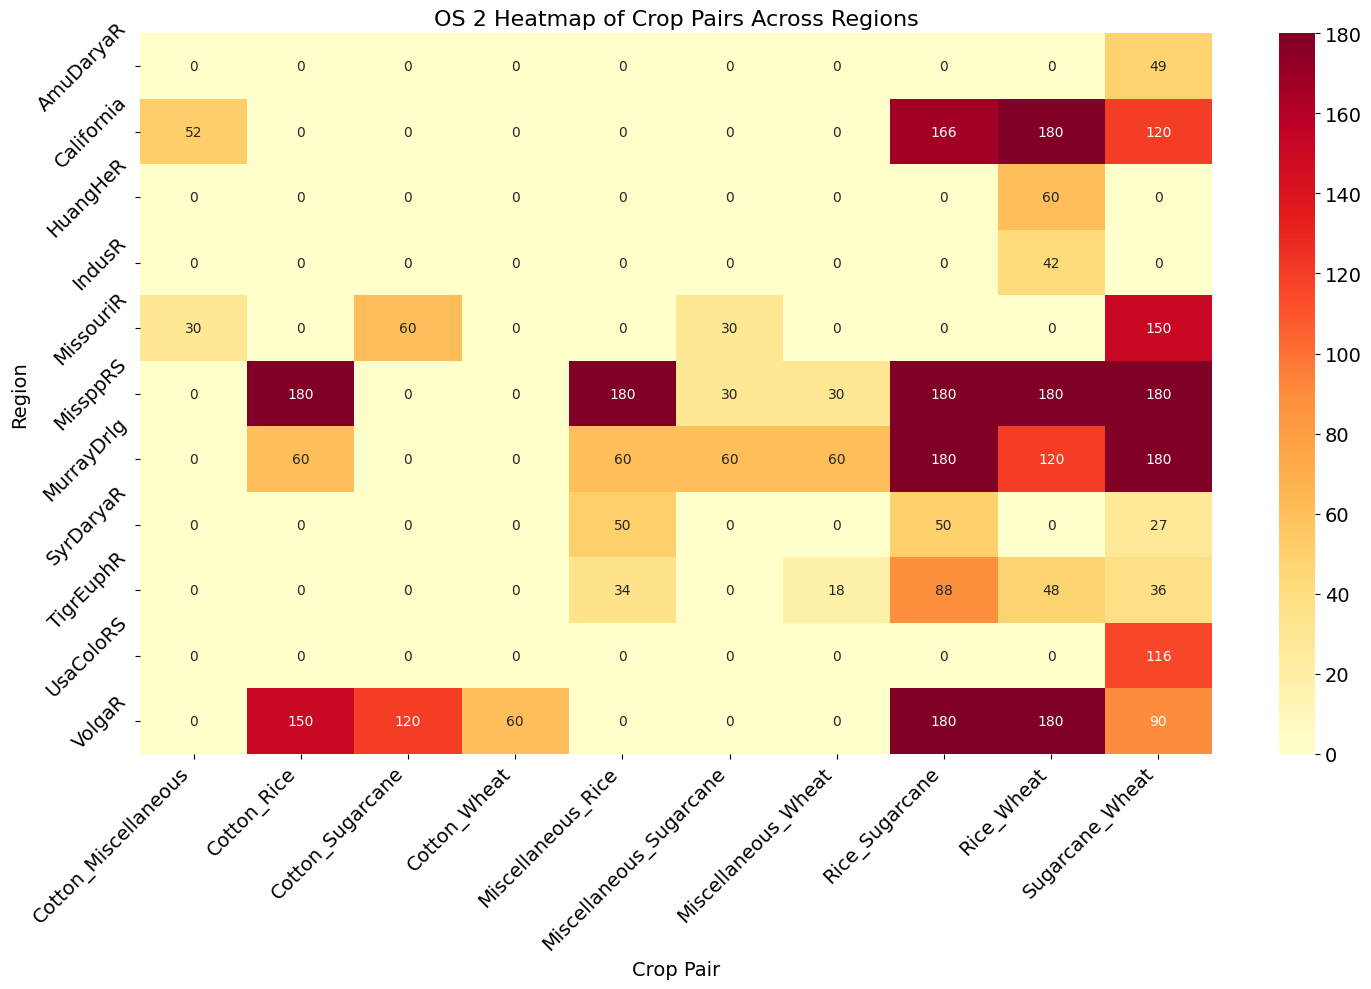

The highest count is 180 and it appears 10 times.
The total sum of counts across all cells is 3866.


In [6]:

df=pd.read_csv('OS_2_BOI_scenarios/OS2_count_sum/consolidated_scenarios_OS2.csv')
# Ensure 'Count' is numeric
df['Count'] = pd.to_numeric(df['Count'])
df=df.dropna()
df

df['Input'] = df['Input'].str.replace('water_td_irr_', '')
df['Input'] = df['Input'].str.replace('_W', '')

df['Input'].unique()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({
    'axes.titlesize': 16,     # Title font size
    'axes.labelsize': 14,     # Axis label font size
    'xtick.labelsize': 14,    # X-axis tick label font size
    'ytick.labelsize': 14,    # Y-axis tick label font size
    'legend.fontsize': 14,    # Legend font size
    'figure.titlesize': 18    # Figure title font size
})

df['Combination'] = df['Combination'].replace({'FiberCrop': 'Cotton', 'SugarCrop': 'Sugarcane', 'MiscAll': 'Miscellaneous'}, regex=True)
# Extract crop names from combinations
df['Crop1'] = df['Combination'].apply(lambda x: x.split(' vs ')[0].split('_')[0])
df['Crop2'] = df['Combination'].apply(lambda x: x.split(' vs ')[1].split('_')[0])

# Create a new column with sorted crop pairs
df['CropPair'] = df.apply(lambda row: '_'.join(sorted([row['Crop1'], row['Crop2']])), axis=1)

# Create a pivot table with the new CropPair column
pivot_data_crops = df.pivot_table(values='Count', index='Input', columns='CropPair', aggfunc='sum', fill_value=0)

# Find the highest count and how many times it appears
highest_count = pivot_data_crops.max().max()
highest_count_appearances = (pivot_data_crops == highest_count).sum().sum()

# Sum the total counts of each cell
total_counts = pivot_data_crops.values.sum()

# Create the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data_crops, annot=True, fmt='d', cmap='YlOrRd')
plt.title('OS 2 Heatmap of Crop Pairs Across Regions')
plt.xlabel('Crop Pair')
plt.ylabel('Region')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('OS2_180_scenarios_heatmap_croppairs_regions.png', dpi=600, bbox_inches='tight')
plt.show()

# Display the highest count and total counts
print(f"The highest count is {highest_count} and it appears {highest_count_appearances} times.")
print(f"The total sum of counts across all cells is {total_counts}.")




